In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cleaning the Dataset

This dataset contains every battle from one day of Clash Royale matches. The data includes a lot of arenas and match types that we don't need or want to focus on, so we'll be needing to clean out the dataset. 

There are 2.8 million rows here. Since the online notebook I'm working in has limited RAM, I'll load it in chunks and then try to clean out unneeded data.

Firstly, all matches which are not  ladder matches should be dropped. The ID corresponding to ladder matches is 72000006, as found online.  I'll remove the unnecessary rows below. 

In [ ]:
battle_chunks = pd.read_csv("/work/JAN1_BATTLES.csv", chunksize = 50000)

arena = []
trophies = []
counter = 5

for chunk in battle_chunks:
    chunk = chunk[chunk["gameMode.id"] == 72000006.0]
    useless_cols = ["gameMode.id", 'Unnamed: 0', 'battleTime', 'winner.tag', 'winner.trophyChange', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.trophyChange', 'loser.clan.tag', 'loser.clan.badgeId', 'tournamentTag',]
    chunk = chunk.drop(useless_cols, axis = 1)
    arena.extend(chunk["arena.id"].tolist())
    trophies.extend(chunk["average.startingTrophies"].tolist())
    cols = chunk.columns

# Dropping Unnecessary Columns

In [ ]:
cols

Index(['arena.id', 'average.startingTrophies', 'winner.startingTrophies',
       'winner.crowns', 'winner.kingTowerHitPoints',
       'winner.princessTowersHitPoints', 'loser.startingTrophies',
       'loser.crowns', 'loser.kingTowerHitPoints',
       'loser.princessTowersHitPoints', 'winner.card1.id',
       'winner.card1.level', 'winner.card2.id', 'winner.card2.level',
       'winner.card3.id', 'winner.card3.level', 'winner.card4.id',
       'winner.card4.level', 'winner.card5.id', 'winner.card5.level',
       'winner.card6.id', 'winner.card6.level', 'winner.card7.id',
       'winner.card7.level', 'winner.card8.id', 'winner.card8.level',
       'winner.cards.list', 'winner.totalcard.level', 'winner.troop.count',
       'winner.structure.count', 'winner.spell.count', 'winner.common.count',
       'winner.rare.count', 'winner.epic.count', 'winner.legendary.count',
       'winner.elixir.average', 'loser.card1.id', 'loser.card1.level',
       'loser.card2.id', 'loser.card2.level', 'loser

Some of these columns won't help in prediction and are just eating up memory.

Obvious columns to remove: ['Unnamed: 0', 'battleTime', 'average.startingTrophies', 'winner.tag', 'winner.trophyChange', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.trophyChange', 'loser.clan.tag', 'loser.clan.badgeId', 'tournamentTag',]

Non-obvious that should be removed: ['average.startingTrophies', 'winner.startingTrophies', 'loser.startingTrophies', 'winner.card1.level', 'winner.card2.level', 'winner.card3.level', 'winner.card4.level', 'winner.card5.level', 'winner.card6.level', 'winner.card7.level', 'winner.card8.level', 'loser.card1.level', 'loser.card2.level', 'loser.card3.level', 'loser.card4.level', 'loser.card5.level', 'loser.card6.level', 'loser.card7.level', 'loser.card8.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 'loser.troop.count', 'loser.structure.count', 'loser.spell.count', 'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count']

The reason for this is that we want to reduce dimensionality here. There shouldn't be too many features. More specifically, the trophies shouldn't matter if we focus arena by arena, since your trophies determine the arena in which you find yourself. This also pertains to the level. Most players at a certain level tend to have the same levels of cards, and if we were to put levels into a model, it would probably just wind up maxing the levels out anyway. The troop, structure, spell, common, rare, epic, legendary columns don't really help since these features are inherent to the cards. Hopefully, our model will be able to find better trends for the cards than the simple labels and types given in the game.

# Visualizing Arena and Trophies

<BarContainer object of 14 artists>

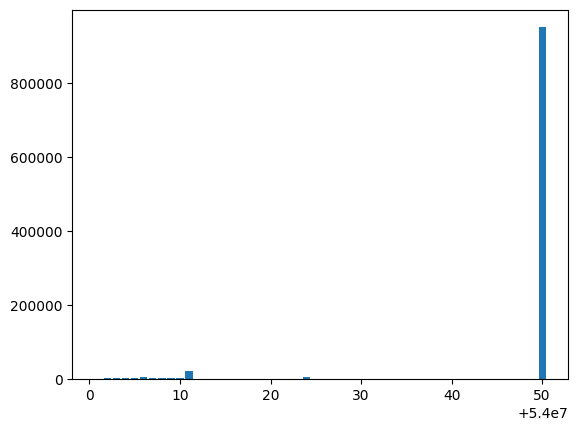

In [ ]:
arena_distribution = pd.Series(arena).value_counts()
plt.bar(arena_distribution.index, arena_distribution.values)

It looks like most of the data concentrates on arena 54000050.0. The others should be removed so we don't introduce any leveling issues to our model. Also, some arenas are limited to certain cards, so if this main arena has a high average trophy count, it would probably be beneficial to get rid of the extras.

(array([  4150.,   6923.,   8746.,   5937.,  13323., 250968., 470020.,
        198572.,  44188.,   5040.]),
 array([  26.  ,  759.05, 1492.1 , 2225.15, 2958.2 , 3691.25, 4424.3 ,
        5157.35, 5890.4 , 6623.45, 7356.5 ]),
 <BarContainer object of 10 artists>)

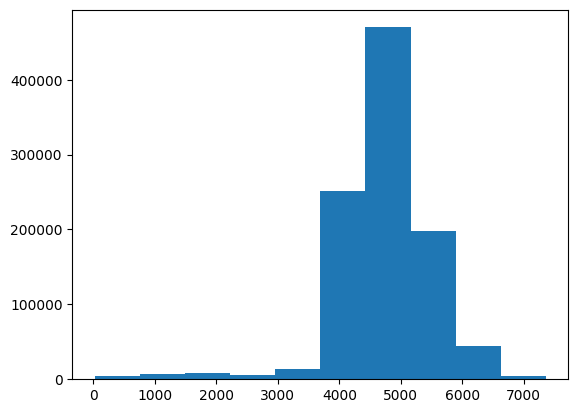

In [ ]:
plt.hist(lst)

The trophies sit at around 4500 on average. By this point in the game, there shouldn't be any cards left to unlock. Thus, it is safe to eliminate other arenas. Also, this takes away the level issue, because most players will have cards around the same level.

In [ ]:
battle_chunks = pd.read_csv("/work/JAN1_BATTLES.csv", chunksize = 50000)

useless_cols = ["gameMode.id", 'Unnamed: 0', 'battleTime', 'winner.tag', 'winner.trophyChange', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.trophyChange', 'loser.clan.tag', 'loser.clan.badgeId', 'tournamentTag',]
non_obv_useless_cols = ['average.startingTrophies', 'winner.startingTrophies', 'loser.startingTrophies', 'winner.card1.level', 'winner.card2.level', 'winner.card3.level', 'winner.card4.level', 'winner.card5.level', 'winner.card6.level', 'winner.card7.level', 'winner.card8.level', 'loser.card1.level', 'loser.card2.level', 'loser.card3.level', 'loser.card4.level', 'loser.card5.level', 'loser.card6.level', 'loser.card7.level', 'loser.card8.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 'loser.troop.count', 'loser.structure.count', 'loser.spell.count', 'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count']
to_drop = useless_cols + non_obv_useless_cols + ['arena.id']

battles = pd.DataFrame()

for chunk in battle_chunks:
    chunk = chunk[chunk["gameMode.id"] == 72000006.0]
    chunk = chunk[chunk["arena.id"] == 54000050.0]
    chunk = chunk.drop(to_drop, axis = 1)
    battles = battles.append(chunk, ignore_index = True)

In [ ]:
battles.to_csv('REDUCED_JAN1_BATTLES.csv', index=False)

# Creating Win Magnitude Feature

The next step is to find a way to classify a win on a qualitative scale based on remaining buildings and health on both sides. This will help to get rid of other columns in the future. It will also reveal the relationship between certain cards and winning or losing the game with a little bit of manual visualization and exploration.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
reduced_battles = pd.read_csv('/work/REDUCED_JAN1_BATTLES.csv')
win_info = reduced_battles[['winner.crowns', 'winner.kingTowerHitPoints','winner.princessTowersHitPoints', 'loser.crowns','loser.kingTowerHitPoints', 'loser.princessTowersHitPoints']]
win_info.head(5)

,winner.crowns,winner.kingTowerHitPoints,winner.princessTowersHitPoints,loser.crowns,loser.kingTowerHitPoints,loser.princessTowersHitPoints
0,2.0,4145.0,[1484],1.0,1402.0,NaN
1,1.0,5304.0,"[579, 3082]",0.0,5107.0,[2280]
2,2.0,5762.0,"[2080, 2099]",0.0,2070.0,NaN
3,2.0,4392.0,[1322],1.0,4228.0,NaN
4,3.0,5832.0,"[3668, 3668]",0.0,NaN,NaN


The above table is a table of the final health of each player's towers.

Want to maximize: [winner.crowns, winner.kingTowerHitPoints, winner.princessTowerHitPoints]

Want to minimize: [winner.crowns, winner.kingTowerHitPoints, winner.princessTowerHitPoints]

Possible approach: maximize crown diff*combined health diff for win magnitude

In [ ]:
import ast
def sum_string_numbers(x):
    try:
        lst = ast.literal_eval(x)
        if isinstance(lst, list):
            return sum(lst)
    except:
        return np.nan
win_info['winner.totalPrincessTowersHitPoints'] = win_info['winner.princessTowersHitPoints'].apply(sum_string_numbers)
win_info['loser.totalPrincessTowersHitPoints'] = win_info['loser.princessTowersHitPoints'].apply(sum_string_numbers)

/tmp/ipykernel_1315/2799547010.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_info['winner.totalPrincessTowersHitPoints'] = win_info['winner.princessTowersHitPoints'].apply(sum_string_numbers)
/tmp/ipykernel_1315/2799547010.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_info['loser.totalPrincessTowersHitPoints'] = win_info['loser.princessTowersHitPoints'].apply(sum_string_numbers)


The princessTowerHitPoints columns are actually strings, not lists, so we need to convert them.  

In [ ]:
win_info['winner.totalPrincessTowersHitPoints'] = win_info['winner.totalPrincessTowersHitPoints'].fillna(0)
win_info['loser.totalPrincessTowersHitPoints'] = win_info['loser.totalPrincessTowersHitPoints'].fillna(0)
win_info['winner.kingTowerHitPoints'] = win_info['winner.kingTowerHitPoints'].fillna(0)
win_info['loser.kingTowerHitPoints'] = win_info['loser.kingTowerHitPoints'].fillna(0)

/tmp/ipykernel_1315/3049611910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_info['winner.totalPrincessTowersHitPoints'] = win_info['winner.totalPrincessTowersHitPoints'].fillna(0)
/tmp/ipykernel_1315/3049611910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_info['loser.totalPrincessTowersHitPoints'] = win_info['loser.totalPrincessTowersHitPoints'].fillna(0)
/tmp/ipykernel_1315/3049611910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

There are some nan values for where all towers of some type are destroyed

In [ ]:
win_info['crown_diff'] = win_info['winner.crowns'] - win_info['loser.crowns']
win_info['winner.total_health'] = win_info['winner.totalPrincessTowersHitPoints'] + win_info['winner.kingTowerHitPoints']
win_info['loser.total_health'] = win_info['loser.totalPrincessTowersHitPoints'] + win_info['loser.kingTowerHitPoints']
win_info['total_health_diff'] = win_info['winner.total_health'] - win_info['loser.total_health']
win_info['win_magnitude'] = win_info['total_health_diff']# * win_info['crown_diff']
win_info.head()

/tmp/ipykernel_1315/1339296534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_info['crown_diff'] = win_info['winner.crowns'] - win_info['loser.crowns']
/tmp/ipykernel_1315/1339296534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_info['winner.total_health'] = win_info['winner.totalPrincessTowersHitPoints'] + win_info['winner.kingTowerHitPoints']
/tmp/ipykernel_1315/1339296534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,winner.crowns,winner.kingTowerHitPoints,winner.princessTowersHitPoints,loser.crowns,loser.kingTowerHitPoints,loser.princessTowersHitPoints,winner.totalPrincessTowersHitPoints,loser.totalPrincessTowersHitPoints,crown_diff,winner.total_health,loser.total_health,total_health_diff,win_magnitude
0,2.0,4145.0,[1484],1.0,1402.0,NaN,1484.0,0.0,1.0,5629.0,1402.0,4227.0,4227.0
1,1.0,5304.0,"[579, 3082]",0.0,5107.0,[2280],3661.0,2280.0,1.0,8965.0,7387.0,1578.0,1578.0
2,2.0,5762.0,"[2080, 2099]",0.0,2070.0,NaN,4179.0,0.0,2.0,9941.0,2070.0,7871.0,7871.0
3,2.0,4392.0,[1322],1.0,4228.0,NaN,1322.0,0.0,1.0,5714.0,4228.0,1486.0,1486.0
4,3.0,5832.0,"[3668, 3668]",0.0,0.0,NaN,7336.0,0.0,3.0,13168.0,0.0,13168.0,13168.0


In [ ]:
min_value = win_info['win_magnitude'].min()
max_value = win_info['win_magnitude'].max()
win_info['normalized_win'] = ((win_info['win_magnitude'] - min_value) / (max_value - min_value)) * 100
win_info['normalized_win'] = win_info['normalized_win'].round().astype(int)

/tmp/ipykernel_1315/3189836436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_info['normalized_win'] = ((win_info['win_magnitude'] - min_value) / (max_value - min_value)) * 100
/tmp/ipykernel_1315/3189836436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_info['normalized_win'] = win_info['normalized_win'].round().astype(int)


In [ ]:
win_info

,winner.crowns,winner.kingTowerHitPoints,winner.princessTowersHitPoints,loser.crowns,loser.kingTowerHitPoints,loser.princessTowersHitPoints,winner.totalPrincessTowersHitPoints,loser.totalPrincessTowersHitPoints,crown_diff,winner.total_health,loser.total_health,total_health_diff,win_magnitude,normalized_win
0,2.0,4145.0,[1484],1.0,1402.0,NaN,1484.0,0.0,1.0,5629.0,1402.0,4227.0,4227.0,57
1,1.0,5304.0,"[579, 3082]",0.0,5107.0,[2280],3661.0,2280.0,1.0,8965.0,7387.0,1578.0,1578.0,45
2,2.0,5762.0,"[2080, 2099]",0.0,2070.0,NaN,4179.0,0.0,2.0,9941.0,2070.0,7871.0,7871.0,75
3,2.0,4392.0,[1322],1.0,4228.0,NaN,1322.0,0.0,1.0,5714.0,4228.0,1486.0,1486.0,44
4,3.0,5832.0,"[3668, 3668]",0.0,0.0,NaN,7336.0,0.0,3.0,13168.0,0.0,13168.0,13168.0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949567,1.0,5080.0,"[1552, 3122]",0.0,5608.0,[3444],4674.0,3444.0,1.0,9754.0,9052.0,702.0,702.0,40
949568,1.0,4860.0,"[955, 2838]",0.0,4860.0,[2218],3793.0,2218.0,1.0,8653.0,7078.0,1575.0,1575.0,45
949569,1.0,4674.0,"[19, 2008]",0.0,4674.0,[1085],2027.0,1085.0,1.0,6701.0,5759.0,942.0,942.0,42
949570,3.0,4759.0,[1519],1.0,0.0,NaN,1519.0,0.0,2.0,6278.0,0.0,6278.0,6278.0,67


Total summed health difference

<BarContainer object of 96 artists>

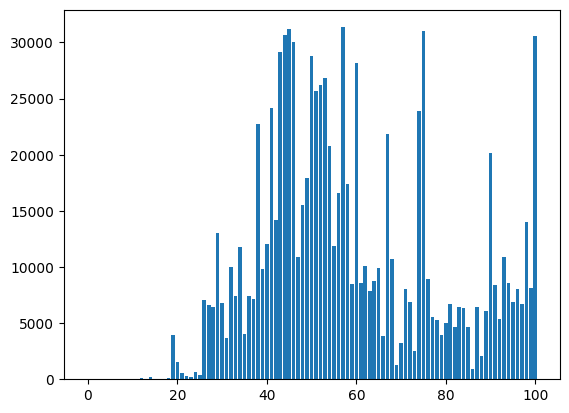

In [ ]:
plt.bar(win_info['normalized_win'].unique(), win_info['normalized_win'].value_counts())

Total summed health difference * crown difference

<BarContainer object of 185 artists>

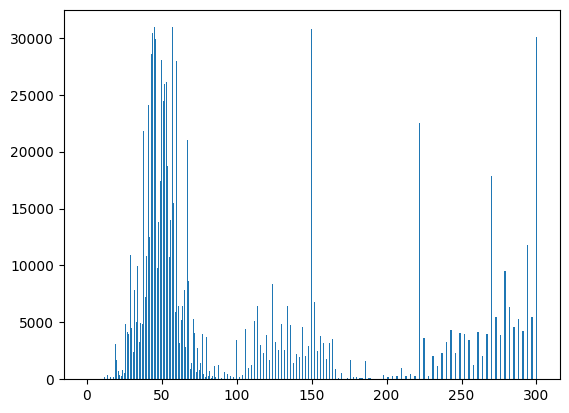

In [ ]:
x = win_info["normalized_win"] * win_info['crown_diff']
plt.bar(x.unique(), x.value_counts())

This metric is trimodal as expected, as we multiplied by the difference in crowns, but it should serve as a good metric to do some data exploration and visualization.

In [ ]:
x.to_csv("win_magnitude.csv", index = False)

# Exporting final data

### Winner Data:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast      
reduced_battles = pd.read_csv('/work/REDUCED_JAN1_BATTLES.csv')
winner_cards_only = reduced_battles['winner.cards.list'].apply(ast.literal_eval)
cards_master = pd.read_csv('/work/CardMasterListSeason18_12082020.csv')

In [ ]:
cards_master["WINNER_NAMES"] = "Winner " + cards_master['team.card1.name']
rename_dict = dict(zip(cards_master['team.card1.id'], cards_master['WINNER_NAMES']))
one_hot_df_winner.rename(columns=rename_dict, inplace=True)

In [ ]:
from scipy import sparse
from scipy.sparse import save_npz
sparse_winner = sparse.csr_matrix(one_hot_df_winner.values)
save_npz('sparse_winner.npz', sparse_winner)
one_hot_df.to_csv('winner_cards.csv', index=False)

### Loser Data:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
reduced_battles = pd.read_csv('/work/REDUCED_JAN1_BATTLES.csv')
loser_cards_only = reduced_battles['loser.cards.list'].apply(ast.literal_eval)
cards_master = pd.read_csv('/work/CardMasterListSeason18_12082020.csv')

In [ ]:
one_hot_data = {card: [] for card in cards_master['team.card1.id']}

for deck in loser_cards_only:
    for card_id in cards_master['team.card1.id']:
        one_hot_data[card_id].append(1 if card_id in deck else 0)

one_hot_df_loser = pd.DataFrame(one_hot_data)

In [ ]:
cards_master["LOSER_NAMES"] = "Loser " + cards_master['team.card1.name']
rename_dict = dict(zip(cards_master['team.card1.id'], cards_master['LOSER_NAMES']))
one_hot_df_loser.rename(columns=rename_dict, inplace=True)

In [ ]:
from scipy import sparse
from scipy.sparse import save_npz
sparse_winner = sparse.csr_matrix(one_hot_df_loser.values)
save_npz('sparse_loser.npz', sparse_winner)
one_hot_df_loser.to_csv('loser_cards.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d7d656a-1712-42ea-b8d4-bc2aecbb225b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>